In [1]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    log,
    expand_log
)
import pylab as plot
params = {
    'legend.fontsize': 20,
    'axes.labelsize': 18,
}
plot.rcParams.update(params)

from sympy.utilities.lambdify import lambdify 
from sympy.plotting import plot
init_printing()
import numpy as np

from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import NelderMead

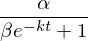

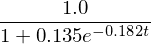

In [2]:
alpha, beta, k = args = var("alpha, beta, k")
t = var("t")
z = var("z")
y_0 = var("y_0")

curve_expr = alpha / (1 + beta * exp(-k*t))
display(curve_expr)
true_curve_expr = curve_expr.subs([(alpha, 1.0), (beta, 0.135), (k, 0.182)])
display(true_curve_expr)


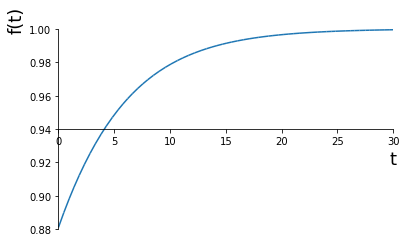

[(0, 0.88105726872246692), (2, 0.91423530175023537), (4, 0.93880144933757803), (6, 0.95666449609497328), (8, 0.96948304337890157), (10, 0.97859473126394758), (12, 0.98502788531184371), (14, 0.98954826451253941), (16, 0.99271394642331112), (18, 0.994925705169311)]


In [3]:
plot(true_curve_expr, (t, 0, 30))
true_curve = lambdify(t, true_curve_expr)
sample_data = [(time, true_curve(time)) for time in np.arange(0, 20, 2)]
print(sample_data)

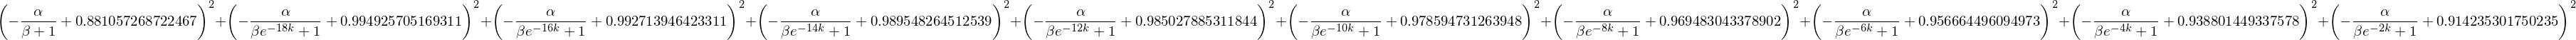

In [4]:
loss_expr = 0
for time, value in sample_data:
    pred_value = curve_expr.subs(t, time)
    loss_expr += (value - pred_value) ** 2
f_expr = loss_expr
display(f_expr)

seed_num = 431
np.random.seed(seed_num)
low = 0.01
high = 2.5
points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
np_func = lambdify([args], f_expr, modules=np) 

In [5]:
points_histories = []
local_minima = np.inf
for i in range(50):
    points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
    nelder = NelderMead(np_func, points)
    _local_minima, points_history = nelder.run(50)
    points_histories.append(points_history)
    local_minima = min(local_minima, _local_minima)
points_histories = np.array(points_histories)
print local_minima

4.70077971557e-06


In [6]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [7]:
X = ip([
    [interval[0.6, 1.5001]],
    [interval[0.1, 2.001]], 
    [interval[0.1, 2.001]]
])

# X = ip([
#     [interval[0.5, 1.6]],
#     [interval[0.5, 3.0]], 
#     [interval[0.6, 3.33]]
# ])

f(X)

In [8]:
kra = Krawczyk(df, ddf, X)

In [9]:
import time
local_minima = np.inf
st = time.time()
ans_boxes, S_num_list, T_num_list, U_num_list, animation_box, max_width_time_series_list = kra.find_global_minimum(
    f, tmp_min_sup=local_minima ,trace=True, cnt_max=100000)
print("{}[sec]".format(time.time() - st))

Loop end. cnt:1170, len(S):0, len(T):2, len(U):0

1170
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([0.9999999999999966, 1.0000000000000038])],
  [interval([0.13499999999999807, 0.1350000000000026])],
  [interval([0.18199999999998798, 0.18200000000001174])]],
 [[interval([0.9999999999999971, 1.000000000000003])],
  [interval([0.13499999999999834, 0.1350000000000023])],
  [interval([0.18199999999998942, 0.18200000000001107])]]]
最小値の上限値: 3.24308113707e-28, 該当区間X: [[interval([0.9999999999999971, 1.000000000000003])], [interval([0.13499999999999834, 0.1350000000000023])], [interval([0.18199999999998942, 0.18200000000001107])]]
384.716498137[sec]


In [10]:
if len(args) == 2: 
    visualize_optimization_log(kra, f, animation_box, skip=200)

In [11]:
def fill_zero_to_right_of_list(array):
    max_len = len(max(array, key=len))
    return [li + [0] * (max_len - len(li)) for li in array]

kra = Krawczyk(df, ddf, X)
local_minima_list = [0.00000470077971557, np.inf]
_S_num_lists = [] # [S_num_list_1, ...]
_max_width_time_series_lists = []
for local_minima in local_minima_list:
    ans_boxes, S_num_list, T_num_list, U_num_list, animation_box, max_width_time_series_list = kra.find_global_minimum(\
        f, tmp_min_sup=local_minima, trace=False, cnt_max=3000, max_width=1e-14)
    _S_num_lists.append(S_num_list)
    _max_width_time_series_lists.append(max_width_time_series_list)
    
_result_list = fill_zero_to_right_of_list(_S_num_lists)
result_list = np.array(_result_list).T

tmp_list = fill_zero_to_right_of_list(_max_width_time_series_lists)
max_width_time_series_lists = np.array(tmp_list).T

Loop end. cnt:568, len(S):0, len(T):2, len(U):0

568
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([0.9999999999999966, 1.0000000000000038])],
  [interval([0.13499999999999807, 0.1350000000000026])],
  [interval([0.18199999999998798, 0.18200000000001174])]],
 [[interval([0.9999999999999971, 1.000000000000003])],
  [interval([0.13499999999999834, 0.1350000000000023])],
  [interval([0.18199999999998942, 0.18200000000001107])]]]
最小値の上限値: 3.24308113707e-28, 該当区間X: [[interval([0.9999999999999971, 1.000000000000003])], [interval([0.13499999999999834, 0.1350000000000023])], [interval([0.18199999999998942, 0.18200000000001107])]]
Loop end. cnt:1170, len(S):0, len(T):2, len(U):0

1170
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([0.9999999999999966, 1.0000000000000038])],
  [interval([0.13499999999999807, 0.1350000000000026])],
  [interval([0.18199

[<matplotlib.text.Text at 0x10a0a0050>, <matplotlib.text.Text at 0x10a089850>]

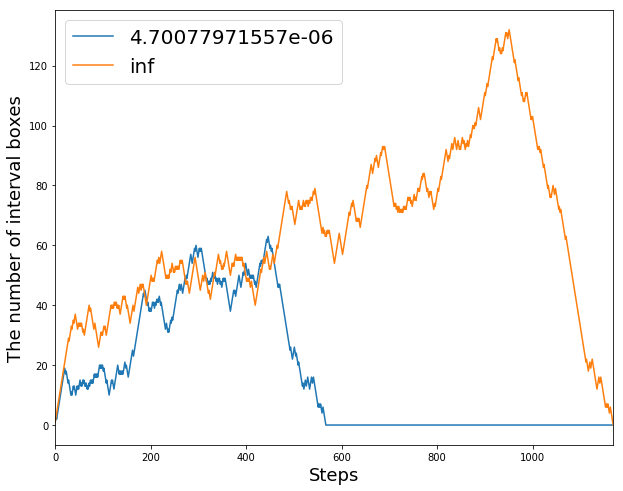

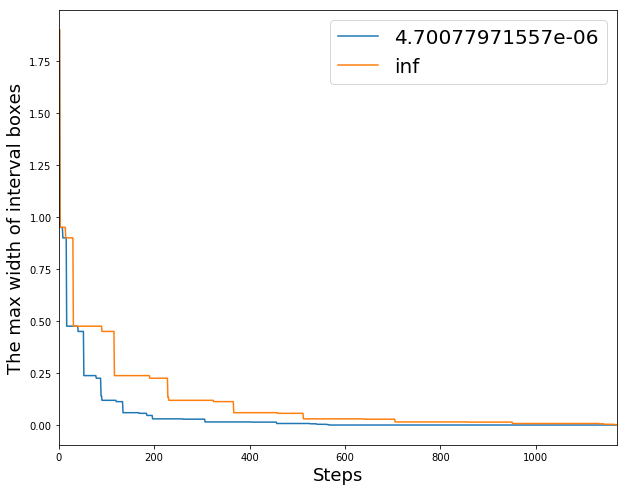

In [12]:
import pandas as pd
result_df = pd.DataFrame(np.array(result_list))
result_df.columns = list(map(str, local_minima_list))
ax = result_df.plot(title='', figsize=(10, 8), legend=True)
ax.set(xlabel="Steps", ylabel="The number of interval boxes")


max_width_df = pd.DataFrame(max_width_time_series_lists)
max_width_df.columns = list(map(str, local_minima_list))
ax = max_width_df.plot(title='', figsize=(10, 8), legend=True)
ax.set(xlabel="Steps", ylabel="The max width of interval boxes")